# Kapi kiše

Ako posmatramo kretanje kapljica kiše, možemo uočiti da se one u momentu pre nego što dođu u kontakt sa tlom kreću konstantom brzinom. Zašto se to dešava, ako su kapljice tela koja padaju pod silom gravitacije? Zašto se ne kreću ubrzano?


Razmotrimo sledeći slučaj - imamo kap kiše u vazduhu, na proizvoljnoj visini od zemlje. Njen početni oblik je sferni, poluprečnika _r_. Na kap naravno deluje gravitaciona sila $F_{g} = F_{D}$, usled koje se kap kreće nadole. Pored gravitacione, na kap takođe deluje sila otpora vazduha $F_{D}$ nasuprod gravitacionoj sili. Ova sila se može posmatrati kao opšta sila otpora pri kretanju tela kroz fluide. Prva stvar koja nam je bitna da razmotrimo je oblik i struktura kapljice. Većina kapi kiše dok padaju zamišlja u obliku 'suze' ili barem generalno sfernog oblika. Međutim, kako je kap sačinjena od tečnosti, njena struktura nije vrlo postojana i oblik joj se lako menja pri delovanju spoljašnjih sila. Iako je početni oblik sferni, u stvarnosti, on zavisi najviše od njene veličine. Ako uzmemo da je početki prečnik kapljice oko 1mm, tokom pada će generalno zadržati sferni oblik. Ako povećavamo njene dimenzije, možemo uočiti da se oblik menja prvo u blago spljoštenu sferu, pa zatim prelazi više u oblik 'kese' (fig. 1). centralni deo kapljice postaje sve tanji i masa se premešta ka spoljnim ivicama. Ovakav oblik se javlja do nekih 5mm, nakon čega se usled veličine kapljice ona razdvaja na više manjih kapljica od <5mm koje mogu da zadrže svoj oblik.   

![kapi](./raindrops.png)

Intenzitet sile otpora vazduha određuje više faktora, kao što su brzina tela koje se kreće kroz vazduh (fluid), gustina sredine, površina projekcije tela na ravni normalnoj pravcu kretanja, kao i zaseban faktor koji zovemo _koeficijent otpora ($C_{D}$)_. Njegova vrednost se računa preko funkcije od osobina vazduha i tela koje se kreće kroz njega, konktretno zapremina i viskoznost vazduha, kao i brzina i karakteristična dužina tela (u slučaju sfernih tela, poluprečnik). Eksperimantalno je utvrđeno da vrednost ovog koeficienta zavisi isključivo od jednog broja, koji zovemo _Rejnoldov broj ($R_{e} = \frac{\rho d}{\eta} v$)_. Iako ne postoji direktna funkcija koja preslikava $R_{e}$ u $C_{d}$, eksperimantalno je utvrđeno da za sferna tela koja imaju isti Rejnoldov broj važi isti koeficijent trenja. Što znači, preko formule za $R_{e}$ možemo zaključiti da ako npr. povećamo brzinu 5 puta a smanjimo zapreminu 5 puta, koeficijent otpora se neće promeniti.

$$F = F_{g} + F_{D} \\
ma = mg - C_{D}(R_{e})\frac{1}{2}\rho v(t)^{2}S \\
ma = mg - C_{D}(\rho, \eta, d, v)\frac{1}{2}\rho v(t)^{2}S $$

Dakle, ukoliko želimo da pronađemo trenutnu brzinu kapi kiše, potrebne su nam vrednosti iz prethodne formule, od kojih su nam sve poznate osim ($C_{D}$). Iako je koeficijent moguće pronaći eksperimentalno za odgovarajuće oblike, dimenzije i materijale sredine/tela, u ovom primeru ćemo iskoristiti uprošćeni model za kretanje tela kroz fluide:
$$
F_{D} = -k_{v}v(t)
$$
Ova formula daje intenzitet sile otpora pri kretanju tela pod malim brzinama, što u našem primeru i jeste slučaj. $k_{v}$ je konstanta koja zavisi od dimenzija tela i viskoznosti fluida.
$$
k_{v} = 6\pi\eta R \\
\Rightarrow F_{D} = 6\pi\eta Rv(t)
$$
Ako znamo da je viskoznost vazduha $\eta = 1.82 × 10^{-5}Pa·s$, a da je gustina vazduha $\rho = 1.293 \frac{kg}{m^{3}} $, odavde dobijamo:
$$
ma = mg - 6\pi\eta Rv(t) \\
ma = mg - 6×1.82 × 10^{-5}\pi Rv(t) \\ 
a = g - \frac{10.92 × 10^{-5}\pi Rv(t)}{m} \\ 
$$

---
$$a = g - \frac{10.92 × 10^{-5}\pi Rv(t)}{\rho V} \\ 
a = g - \frac{10.92 × 10^{-5}\pi Rv(t)}{\rho\frac{4}{3}\pi (\frac{R}{2})^{3}} \\ 
a = g - \frac{10.92 × 10^{-5} Rv(t)}{\rho \frac{R^{3}}{6}} \\ 
a = g - \frac{65.52 × 10^{-5} v(t)}{\rho R^{2}} \\ 
a = g - \frac{65.52 × 10^{-5} v(t)}{1.293 R^{2}} \\ 
a = g - \frac{65.52 × 10^{-5}}{1.293} × \frac{v(t)}{R^{2}} \\ $$

Masa kapljice:  5.235987755982989e-07


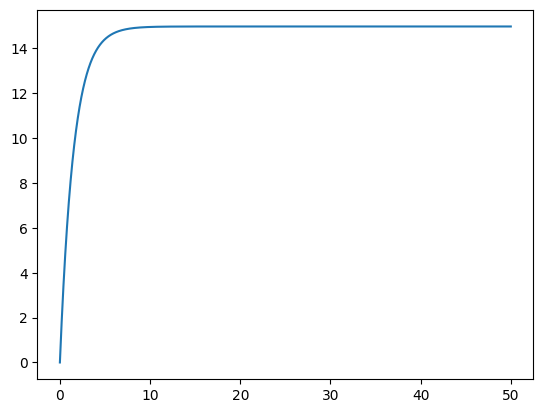

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import math

#Konstante
g = 9.81 #m/h^2
roW = 1000 #kg/m^3 - gustina vode
roA = 1.293 #kg/m^3 - gustina vazduha
vA = 1.5e-5
kv = 10.92e-5 * 3.14

#Zadati podaci
t = 50 #s
dt = 0.001 #s
R = 0.001 #m

n = int(round(t/dt))
v = np.zeros(n,float)
a = np.zeros(n,float)
t = np.zeros(n,float)

v[0] = 0

m = roW * 4/3 * math.pi * (R/2)**3 
print("Masa kapljice: ", m)

"""
for i in range(n-1):
    a[i] = g - (kv/m)*v[i]
    v[i+1] = v[i] + a[i]*dt
    t[i+1] = t[i] + dt
a[n-1] = g - (kv/m)*v[n-1]
"""
for i in range(n-1):
    a[i] = g - (kv*R/m)*v[i]
    v[i+1] = v[i] + a[i]*dt
    t[i+1] = t[i] + dt
a[n-1] = g - (kv*R/m)*v[n-1]
plt.plot(t, v)
plt.show()

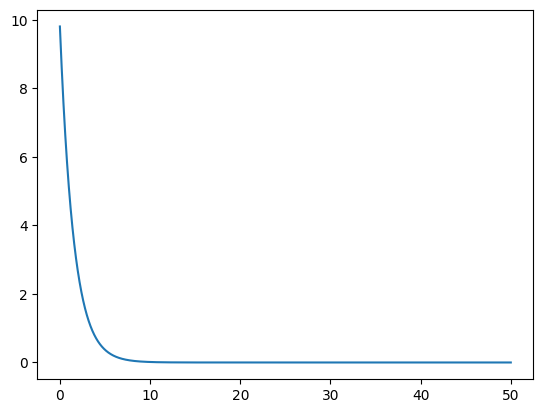

In [67]:
plt.plot(t, a)
plt.show()

PRIMER: Za koliko vremena će kap kiše pasti na zemlju sa početne visine _h_?

In [68]:
h = 100 #m

while(h <= 1000):
    i = 0
    v = np.zeros(n,float)
    a = np.zeros(n,float)
    t = np.zeros(n,float)
    v[0] = 0
    hTr = h
    tTr = 0 #traženo vreme

    while(hTr - v[i] > 0):
        a[i] = g - ((kv*R)/m)*v[i]
        v[i+1] = v[i] + a[i]*dt
        hTr -= v[i]*dt
        i += 1
        tTr += dt

    print("Sa visine od ", h, "m, kapljica ce pasti na zemlju za ", tTr, " sekundi, brzinom ", v[i], " m/s")
    h+=100


Sa visine od  100 m, kapljica ce pasti na zemlju za  7.1980000000007385  sekundi, brzinom  14.845939828016485  m/s
Sa visine od  200 m, kapljica ce pasti na zemlju za  13.877999999997748  sekundi, brzinom  14.97843425882935  m/s
Sa visine od  300 m, kapljica ce pasti na zemlju za  20.554000000002137  sekundi, brzinom  14.98010047788791  m/s
Sa visine od  400 m, kapljica ce pasti na zemlju za  27.230000000010296  sekundi, brzinom  14.980121487550566  m/s
Sa visine od  500 m, kapljica ce pasti na zemlju za  33.90500000001168  sekundi, brzinom  14.980121752463056  m/s
Sa visine od  600 m, kapljica ce pasti na zemlju za  40.58099999999612  sekundi, brzinom  14.98012175580561  m/s
Sa visine od  700 m, kapljica ce pasti na zemlju za  47.25599999998057  sekundi, brzinom  14.980121755846945  m/s


IndexError: index 50000 is out of bounds for axis 0 with size 50000